# Dataset notes:

- [Link to the data dictionary and info](https://www.kaggle.com/uciml/student-alcohol-consumption)
- **There are 2 separated CSVs:** 
    - Both datasets include demographic information regarding a specific student.
    - One pertains to performance in a Math class.
        - The Math dataset contains 395 students.
        - It contains 33 columns.
    - One pertains to performance in a Portugeuse (Por) Language class.
        - The Por dataset contains 649  students.
        - It contains 33 columns.
- **I will be using the combined dataset.**

# Imports

In [194]:
# Tools
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Transformation
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, \
                                 LogisticRegression, \
                                 LassoCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier, \
                             AdaBoostClassifier, \
                             GradientBoostingClassifier, \
                             RandomForestClassifier, \
                             ExtraTreesClassifier, \
                             BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# Dataframe

## Create

In [117]:
df_math = pd.read_csv("../data/student-mat.csv")
df_por = pd.read_csv("../data/student-por.csv")
df = df_math.append(df_por, ignore_index=True)

In [118]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [119]:
df.shape

(1044, 33)

## NaN, Dtypes, Value Counts

In [120]:
# NaN
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [121]:
# How many numeric, obj, and categ cols?
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [122]:
# Check value counts:
vc_dict = {}
for col in df:
    vc_dict[col] = df[col].value_counts()

vc_dict["school"]

GP    772
MS    272
Name: school, dtype: int64

## Section Notes:

- A dictionary of the value_counts of each columnn was created to make it easier to reference later on.
- No NaN in DF
- Clean enough to work with, will need a decent amount of feature engineering in order incorporate the current numeric and categorical columns.

# Feature Engineering

## Create Numeric Columns

In [123]:
# Check the non-numeric cols:
obj_list = []
for col in df:
    if df[col].dtype == "object":
        obj_list.append(col)

# The list of columns that are non-numeric:
obj_list

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [124]:
bin_list = []
dummies_list = []

for k,v in vc_dict.items():  # Iterate thru dict created in previous section of value_counts in the df
    if k in obj_list:  # Check the keys if the cols have object values (available in obj_list)
        if v.count() == 2:  # if the count of object values equals 2
            bin_list.append(v)  # add to a list of variables to be binarized 
        elif v.count() >= 3:  # else if greater than 3
            dummies_list.append(v)  # add to list of cols to be dummied
# Check:
bin_list

[GP    772
 MS    272
 Name: school, dtype: int64,
 F    591
 M    453
 Name: sex, dtype: int64,
 U    759
 R    285
 Name: address, dtype: int64,
 GT3    738
 LE3    306
 Name: famsize, dtype: int64,
 T    923
 A    121
 Name: Pstatus, dtype: int64,
 no     925
 yes    119
 Name: schoolsup, dtype: int64,
 yes    640
 no     404
 Name: famsup, dtype: int64,
 no     824
 yes    220
 Name: paid, dtype: int64,
 no     528
 yes    516
 Name: activities, dtype: int64,
 yes    835
 no     209
 Name: nursery, dtype: int64,
 yes    955
 no      89
 Name: higher, dtype: int64,
 yes    827
 no     217
 Name: internet, dtype: int64,
 no     673
 yes    371
 Name: romantic, dtype: int64]

In [125]:
vc_dict

{'school': GP    772
 MS    272
 Name: school, dtype: int64,
 'sex': F    591
 M    453
 Name: sex, dtype: int64,
 'age': 16    281
 17    277
 18    222
 15    194
 19     56
 20      9
 21      3
 22      2
 Name: age, dtype: int64,
 'address': U    759
 R    285
 Name: address, dtype: int64,
 'famsize': GT3    738
 LE3    306
 Name: famsize, dtype: int64,
 'Pstatus': T    923
 A    121
 Name: Pstatus, dtype: int64,
 'Medu': 4    306
 2    289
 3    238
 1    202
 0      9
 Name: Medu, dtype: int64,
 'Fedu': 2    324
 1    256
 3    231
 4    224
 0      9
 Name: Fedu, dtype: int64,
 'Mjob': other       399
 services    239
 at_home     194
 teacher     130
 health       82
 Name: Mjob, dtype: int64,
 'Fjob': other       584
 services    292
 teacher      65
 at_home      62
 health       41
 Name: Fjob, dtype: int64,
 'reason': course        430
 home          258
 reputation    248
 other         108
 Name: reason, dtype: int64,
 'guardian': mother    728
 father    243
 other     

## Binarize

In [126]:
# Will take a different approach later, don't want to get bogged down on more complex functions

def to_binarize(data, col, value1, value2):
    data[col] = data[col].map({value1: 1, value2: 0})
    return data

In [127]:
bin_list

[GP    772
 MS    272
 Name: school, dtype: int64,
 F    591
 M    453
 Name: sex, dtype: int64,
 U    759
 R    285
 Name: address, dtype: int64,
 GT3    738
 LE3    306
 Name: famsize, dtype: int64,
 T    923
 A    121
 Name: Pstatus, dtype: int64,
 no     925
 yes    119
 Name: schoolsup, dtype: int64,
 yes    640
 no     404
 Name: famsup, dtype: int64,
 no     824
 yes    220
 Name: paid, dtype: int64,
 no     528
 yes    516
 Name: activities, dtype: int64,
 yes    835
 no     209
 Name: nursery, dtype: int64,
 yes    955
 no      89
 Name: higher, dtype: int64,
 yes    827
 no     217
 Name: internet, dtype: int64,
 no     673
 yes    371
 Name: romantic, dtype: int64]

In [128]:
to_binarize(df, "school", "GP", "MS")
to_binarize(df, "sex", "F", "M")
to_binarize(df, "address", "U", "R")
to_binarize(df, "famsize", "GT3", "LE3")
to_binarize(df, "Pstatus", "T", "A")
to_binarize(df, "schoolsup", "yes", "no")  # Went in diff order
to_binarize(df, "famsup", "yes", "no")  # Went in  diff order
to_binarize(df, "paid", "yes", "no")  # went in diff order
to_binarize(df, "activities", "yes", "no") # went in diff order
to_binarize(df, "nursery", "yes", "no")
to_binarize(df, "higher", "yes", "no")
to_binarize(df, "internet", "yes", "no")
to_binarize(df, "romantic", "yes", "no")  # went  in diff order

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,1,19,0,1,1,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,0,1,18,1,0,1,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,0,1,18,1,1,1,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,0,0,17,1,0,1,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [129]:
df.dtypes

school         int64
sex            int64
age            int64
address        int64
famsize        int64
Pstatus        int64
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [130]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Get Dummies

In [131]:
dummies_list

[other       399
 services    239
 at_home     194
 teacher     130
 health       82
 Name: Mjob, dtype: int64,
 other       584
 services    292
 teacher      65
 at_home      62
 health       41
 Name: Fjob, dtype: int64,
 course        430
 home          258
 reputation    248
 other         108
 Name: reason, dtype: int64,
 mother    728
 father    243
 other      73
 Name: guardian, dtype: int64]

In [132]:
df = pd.get_dummies(df, columns=["Mjob", "Fjob", "reason", "guardian"])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,1,19,0,1,1,2,3,1,3,...,1,0,0,1,0,0,0,0,1,0
1040,0,1,18,1,0,1,3,1,1,2,...,0,1,0,1,0,0,0,0,1,0
1041,0,1,18,1,1,1,1,1,2,2,...,1,0,0,1,0,0,0,0,1,0
1042,0,0,17,1,0,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0


In [133]:
df.dtypes

school               int64
sex                  int64
age                  int64
address              int64
famsize              int64
Pstatus              int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
F

## EDA & Visualizations

In [65]:
# df.dtypes

In [165]:
df.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,have_failed,high_absences,student_drinker
school,1.000000,-0.074955,-0.169938,0.341657,0.034882,-0.024030,0.235114,0.187611,-0.258834,0.133255,...,-0.119580,0.112408,-0.185319,0.156975,-0.055202,0.050685,0.000164,-0.110899,0.117052,-0.066020
sex,-0.074955,1.000000,0.038832,-0.011556,0.094361,-0.051337,-0.109387,-0.070786,-0.042508,0.239972,...,0.017987,-0.058480,-0.026260,0.057261,-0.043723,0.024757,0.027853,-0.048772,-0.012740,-0.177854
age,-0.169938,0.038832,1.000000,-0.071257,-0.013290,0.006887,-0.130196,-0.138521,0.049216,-0.007870,...,0.018524,-0.002368,0.006563,-0.023719,-0.126978,-0.081701,0.357601,0.307203,0.128406,0.111338
address,0.341657,-0.011556,-0.071257,1.000000,-0.054484,-0.074097,0.179720,0.124303,-0.343803,0.037480,...,-0.068215,0.161658,-0.074252,-0.031823,0.027150,-0.019957,-0.009037,-0.085068,0.014650,-0.051571
famsize,0.034882,0.094361,-0.013290,-0.054484,1.000000,0.207302,0.025556,0.047290,-0.031550,0.035109,...,0.008699,-0.011608,0.039076,-0.026257,0.011075,-0.021165,0.019775,0.042273,-0.036558,-0.076494
Pstatus,-0.024030,-0.051337,0.006887,-0.074097,0.207302,1.000000,-0.077133,-0.049156,0.033883,0.005049,...,0.029409,-0.035364,0.034559,-0.022898,0.128616,-0.069200,-0.088464,0.009521,-0.117328,0.079302
Medu,0.235114,-0.109387,-0.130196,0.179720,0.025556,-0.077133,1.000000,0.642063,-0.238181,0.090616,...,-0.116806,0.024313,-0.022861,0.126800,-0.043620,0.097703,-0.103730,-0.211582,0.040999,-0.031270
Fedu,0.187611,-0.070786,-0.138521,0.124303,0.047290,-0.049156,0.642063,1.000000,-0.196328,0.033458,...,-0.059851,0.011945,-0.025451,0.075322,0.094286,-0.046298,-0.072834,-0.174131,0.013880,0.006093
traveltime,-0.258834,-0.042508,0.049216,-0.343803,-0.031550,0.033883,-0.238181,-0.196328,1.000000,-0.081328,...,0.128033,-0.112132,0.040928,-0.063705,0.024526,-0.061961,0.070983,0.087123,-0.007520,0.038154
studytime,0.133255,0.239972,-0.007870,0.037480,0.035109,0.005049,0.090616,0.033458,-0.081328,1.000000,...,-0.084553,-0.019542,-0.097277,0.187202,0.011457,-0.020958,0.018770,-0.149732,-0.066687,-0.200580


In [28]:
# df_family.corr()

In [29]:
# df_student.corr()

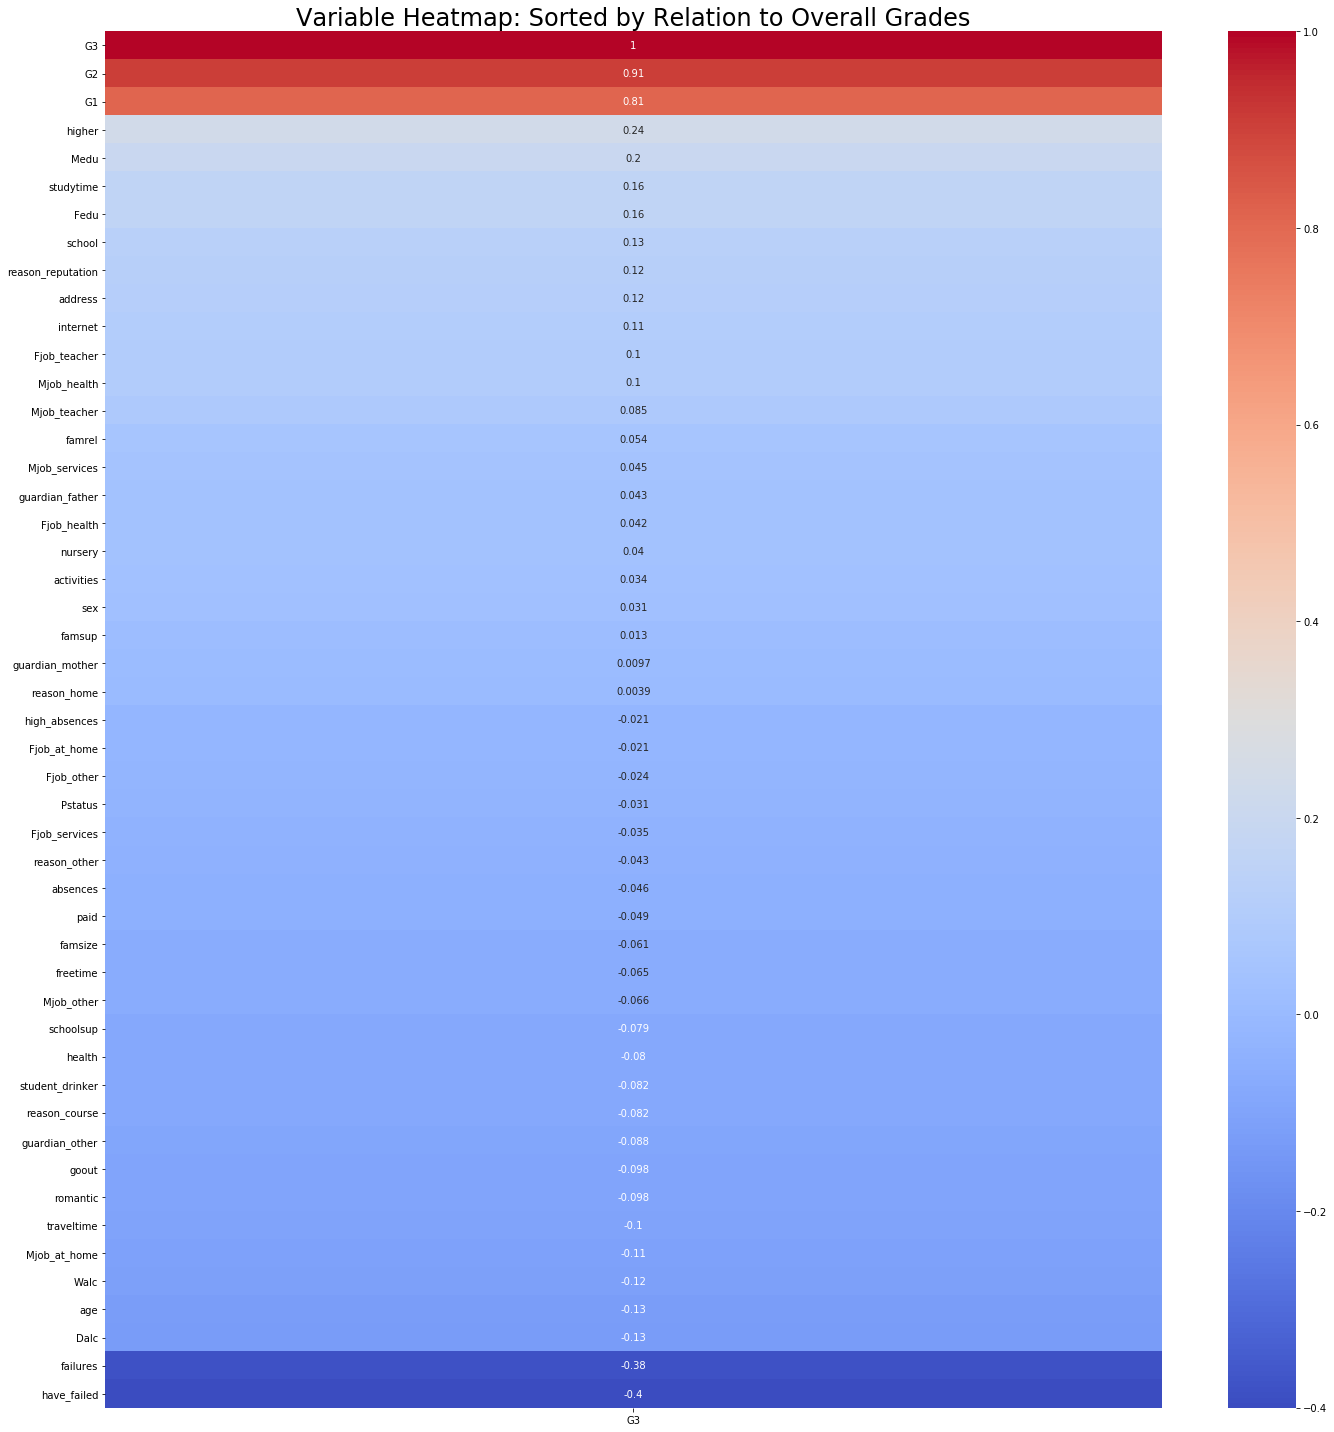

In [166]:
plt.figure(figsize=(20, 20))

sns.heatmap(df.corr()[
           ["G3"]].sort_values(by=["G3"], ascending=False),
           cmap="coolwarm",
           annot=True);
plt.title("Variable Heatmap: Sorted by Relation to Overall Grades", fontsize=24)
plt.tight_layout()

plt.savefig("../visuals/heatmap.png")

## Feature Creation

In [67]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'fam_metrics',
       'have_failed', 'high_absences', 'student_drinker'],
      dtype='object')

In [68]:
# studytime, failures, absences, freetime

In [134]:
df["failures"].value_counts()

0    861
1    120
2     33
3     30
Name: failures, dtype: int64

In [135]:
df["have_failed"] = df["failures"] > 0
df["have_failed"].map({True: 1, False: 0})
df["have_failed"].value_counts()  # 183 have failed

False    861
True     183
Name: have_failed, dtype: int64

In [136]:
df["absences"].value_counts()  # 359 have 0 absences
df["absences"].mean()  # Mean is 4.43
(df["absences"] > df["absences"].mean()).sum()  # 334 greater than the mean number of absences
df["high_absences"] = (df["absences"] > df["absences"].mean()).map({True: 1, False: 0})
df["high_absences"].value_counts()

0    710
1    334
Name: high_absences, dtype: int64

In [137]:
df["Walc"].value_counts()

1    398
2    235
3    200
4    138
5     73
Name: Walc, dtype: int64

In [138]:
df["student_drinker"] = (df["Walc"] > 1).map({True: 1, False: 0})

In [139]:
df["student_drinker"].value_counts()

1    646
0    398
Name: student_drinker, dtype: int64

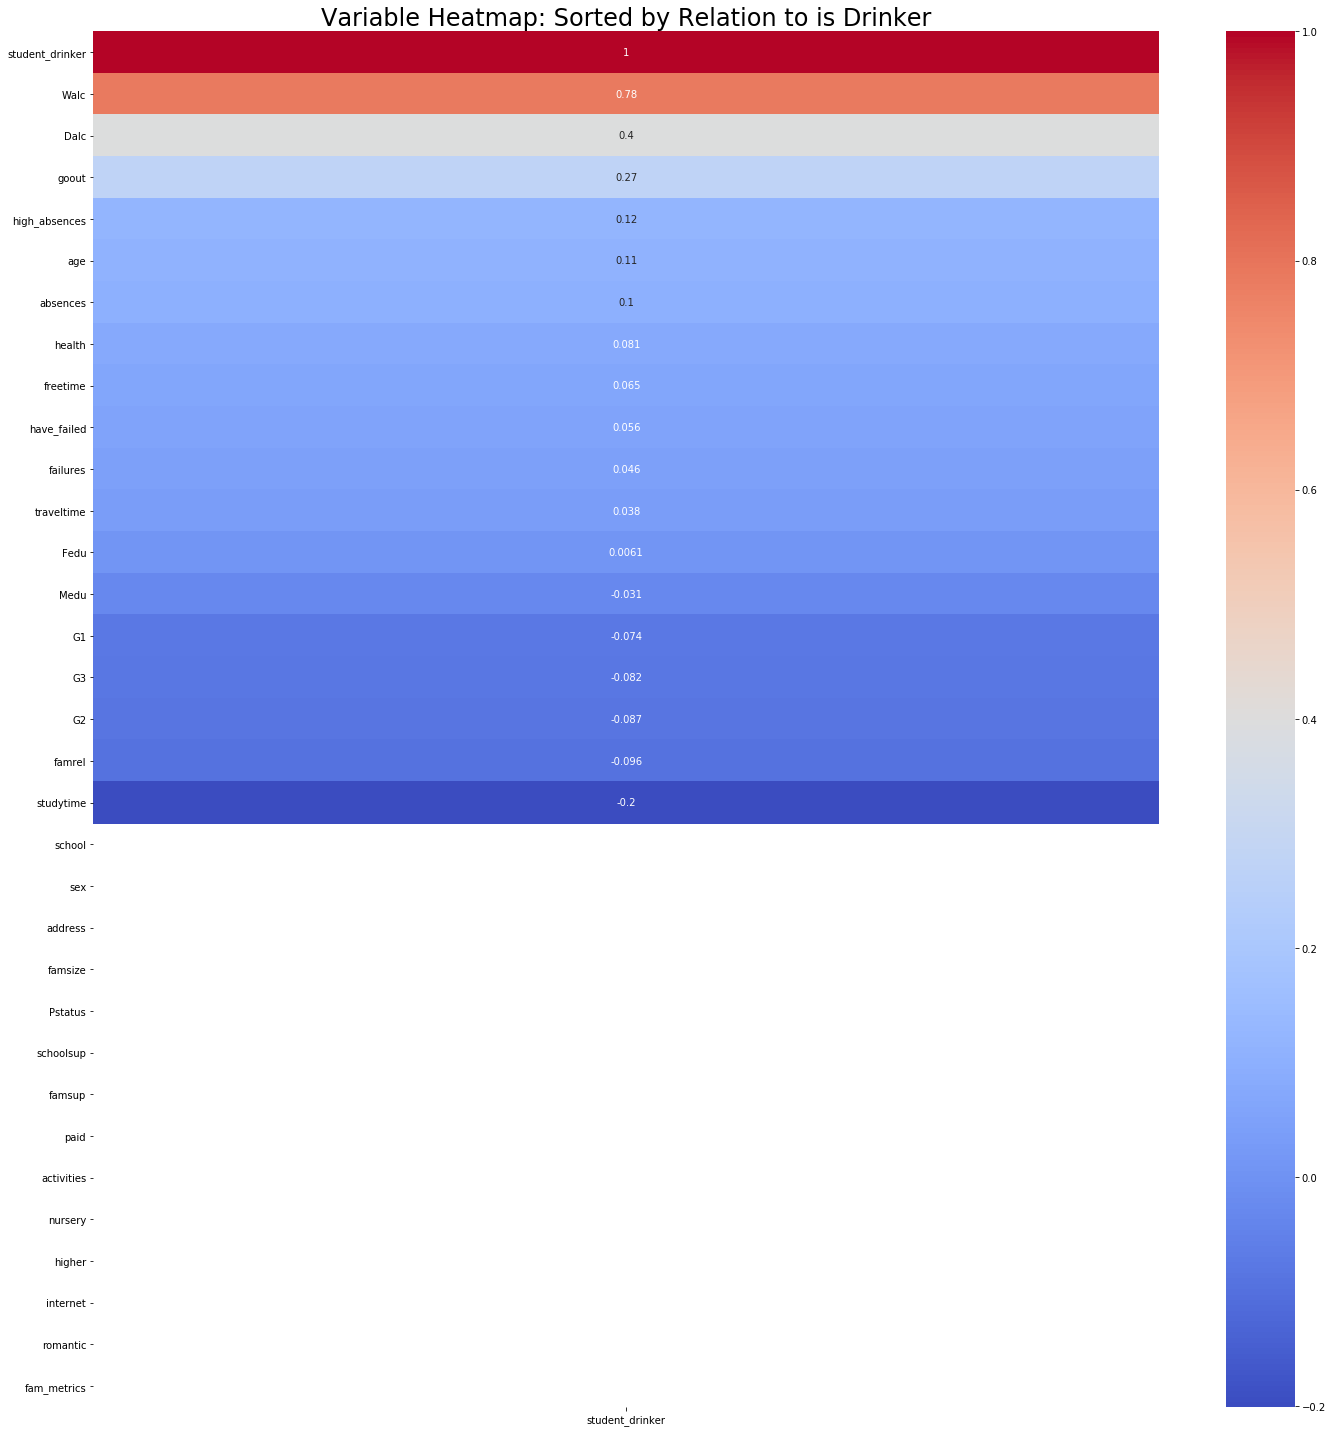

In [75]:
plt.figure(figsize=(20, 20))

sns.heatmap(df.corr()[
           ["student_drinker"]].sort_values(by=["student_drinker"], ascending=False),
           cmap="coolwarm",
           annot=True);
plt.title("Variable Heatmap: Sorted by Relation to is Drinker", fontsize=24)
plt.tight_layout()

plt.savefig("../visuals/heatmap_drinker.png")

### Save DF

In [141]:
df.to_csv("../data/clean_df.csv")

## New DF

In [330]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'fam_metrics', 'student_drinker'],
      dtype='object')

In [167]:
df_student = df[["traveltime", "studytime", "have_failed", "schoolsup", "activities", "higher", "freetime", "G3"]]
df_student.head()

,traveltime,studytime,have_failed,schoolsup,activities,higher,freetime,G3
0,2,2,False,1,0,1,3,6
1,1,2,False,0,0,1,3,6
2,1,2,True,1,0,1,3,10
3,1,3,False,0,1,1,2,15
4,1,2,False,0,0,1,3,10


In [170]:
df_student.to_csv("../data/clean_df_student.csv")

In [366]:
df_family = df[["famsize", 
                "Pstatus", 
                "Medu", 
                "Fedu", 
                "famsup", 
                "internet", 
                "famrel", 
                "Mjob_at_home",
                'Mjob_health', 
                'Mjob_other', 
                'Mjob_services',
                'Mjob_teacher',
                "Fjob_at_home",
                'Fjob_health', 
                'Fjob_other',
                'Fjob_services', 
                'Fjob_teacher',
                'guardian_father',
                'guardian_mother', 
                'guardian_other',
                "G3"]]

df_family.head()

,famsize,Pstatus,Medu,Fedu,famsup,internet,famrel,Mjob_at_home,Mjob_health,Mjob_other,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other,G3
0,1,0,4,4,0,0,4,1,0,0,...,0,0,0,0,0,1,0,1,0,6
1,1,1,1,1,1,1,5,1,0,0,...,0,0,0,1,0,0,1,0,0,6
2,0,1,1,1,0,1,4,1,0,0,...,0,0,0,1,0,0,0,1,0,10
3,1,1,4,2,1,1,3,0,1,0,...,0,0,0,0,1,0,0,1,0,15
4,1,1,3,3,1,0,4,0,0,1,...,0,0,0,1,0,0,1,0,0,10


# Classification

## Grades Classification: Predict if in bottom 50% of class with overall grades

### Feature Set

In [98]:
# Check possible Y variable buckets:
# ((df["G3"] > 10).astype(int)).value_counts()

In [227]:
X = df.drop(axis=1, columns=["G1", "G2", "G3"])
y = (df["G3"] > 10).astype(int)

In [228]:
y.value_counts(normalize=True)

1    0.633142
0    0.366858
Name: G3, dtype: float64

### Train/Test Split, Baseline Accuracy

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [230]:
y_test.value_counts(normalize=True)

1    0.631884
0    0.368116
Name: G3, dtype: float64

### KNN

In [103]:
ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", ss),
    ("knn", KNeighborsClassifier())
])

knn_params = {
    "knn__n_neighbors": [7, 9, 11],
    "knn__p": [1, 2]
}

knn_gs = GridSearchCV(
    knn_pipe,
    knn_params,
    cv=5,
    verbose=10
)

In [104]:
knn_gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] knn__n_neighbors=7, knn__p=1 ....................................
[CV] ........ knn__n_neighbors=7, knn__p=1, score=0.721, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=1 ....................................
[CV] ........ knn__n_neighbors=7, knn__p=1, score=0.686, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=1 ....................................
[CV] ........ knn__n_neighbors=7, knn__p=1, score=0.650, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=1 ....................................
[CV] ........ knn__n_neighbors=7, knn__p=1, score=0.621, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=1 ....................................
[CV] ........ knn__n_neighbors=7, knn__p=1, score=0.683, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=2 ....................................
[CV] ........ knn__n_neighbors=7, knn__p=2, score=0.721, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=2 ....................................
[CV] ........ knn

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV] ........ knn__n_neighbors=9, knn__p=2, score=0.693, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=2 ....................................
[CV] ........ knn__n_neighbors=9, knn__p=2, score=0.614, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=2 ....................................
[CV] ........ knn__n_neighbors=9, knn__p=2, score=0.712, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1 ...................................
[CV] ....... knn__n_neighbors=11, knn__p=1, score=0.707, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1 ...................................
[CV] ....... knn__n_neighbors=11, knn__p=1, score=0.671, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1 ...................................
[CV] ....... knn__n_neighbors=11, knn__p=1, score=0.679, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1 ...................................
[CV] ....... knn__n_neighbors=11, knn__p=1, score=0.636, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             ii

In [105]:
# Check Scores:
print(f"Train Score: {knn_gs.score(X_train, y_train)}")
print(f"Test Score: {knn_gs.score(X_test, y_test)}\n")
print(f"Best Score: {knn_gs.best_score_}")

Train Score: 0.7467811158798283
Test Score: 0.6811594202898551

Best Score: 0.6795477903391571


In [173]:
knn_gs.best_params_

{'knn__n_neighbors': 9, 'knn__p': 2}

### Logistic Regression

In [106]:
logreg_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("logreg", LogisticRegression())
])

logreg_params = {
    "logreg__penalty": ["l1", "l2"],
    "logreg__solver": ["saga", "liblinear"],
    "logreg__C": [0.5, 1,0, 1.5]
}

logreg_gs = GridSearchCV(
    logreg_pipe,
    logreg_params,
    cv=5,
    verbose=10
)

In [107]:
logreg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] logreg__C=0.5, logreg__penalty=l1, logreg__solver=saga ..........
[CV]  logreg__C=0.5, logreg__penalty=l1, logreg__solver=saga, score=0.771, total=   0.0s
[CV] logreg__C=0.5, logreg__penalty=l1, logreg__solver=saga ..........
[CV]  logreg__C=0.5, logreg__penalty=l1, logreg__solver=saga, score=0.779, total=   0.0s
[CV] logreg__C=0.5, logreg__penalty=l1, logreg__solver=saga ..........
[CV]  logreg__C=0.5, logreg__penalty=l1, logreg__solver=saga, score=0.721, total=   0.0s
[CV] logreg__C=0.5, logreg__penalty=l1, logreg__solver=saga ..........
[CV]  logreg__C=0.5, logreg__penalty=l1, logreg__solver=saga, score=0.679, total=   0.0s
[CV] logreg__C=0.5, logreg__penalty=l1, logreg__solver=saga ..........
[CV]  logreg__C=0.5, logreg__penalty=l1, logreg__solver=saga, score=0.763, total=   0.0s
[CV] logreg__C=0.5, logreg__penalty=l1, logreg__solver=liblinear .....
[CV]  logreg__C=0.5, logreg__penalty=l1, logreg__solver=liblinear, s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  logreg__C=1, logreg__penalty=l1, logreg__solver=saga, score=0.777, total=   0.0s
[CV] logreg__C=1, logreg__penalty=l1, logreg__solver=liblinear .......
[CV]  logreg__C=1, logreg__penalty=l1, logreg__solver=liblinear, score=0.771, total=   0.0s
[CV] logreg__C=1, logreg__penalty=l1, logreg__solver=liblinear .......
[CV]  logreg__C=1, logreg__penalty=l1, logreg__solver=liblinear, score=0.786, total=   0.0s
[CV] logreg__C=1, logreg__penalty=l1, logreg__solver=liblinear .......
[CV]  logreg__C=1, logreg__penalty=l1, logreg__solver=liblinear, score=0.714, total=   0.0s
[CV] logreg__C=1, logreg__penalty=l1, logreg__solver=liblinear .......
[CV]  logreg__C=1, logreg__penalty=l1, logreg__solver=liblinear, score=0.671, total=   0.0s
[CV] logreg__C=1, logreg__penalty=l1, logreg__solver=liblinear .......
[CV]  logreg__C=1, logreg__penalty=l1, logreg__solver=liblinear, score=0.777, total=   0.0s
[CV] logreg__C=1, logreg__penalty=l2, logreg__solver=saga ............
[CV]  logreg__C=1, logreg__

/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: float division by zero

  FitFailedWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: float division by zero

  FitFailedWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: float division by zero

  FitFailedWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit faile

[CV]  logreg__C=1.5, logreg__penalty=l1, logreg__solver=saga, score=0.707, total=   0.0s
[CV] logreg__C=1.5, logreg__penalty=l1, logreg__solver=saga ..........
[CV]  logreg__C=1.5, logreg__penalty=l1, logreg__solver=saga, score=0.679, total=   0.0s
[CV] logreg__C=1.5, logreg__penalty=l1, logreg__solver=saga ..........
[CV]  logreg__C=1.5, logreg__penalty=l1, logreg__solver=saga, score=0.777, total=   0.0s
[CV] logreg__C=1.5, logreg__penalty=l1, logreg__solver=liblinear .....
[CV]  logreg__C=1.5, logreg__penalty=l1, logreg__solver=liblinear, score=0.771, total=   0.0s
[CV] logreg__C=1.5, logreg__penalty=l1, logreg__solver=liblinear .....
[CV]  logreg__C=1.5, logreg__penalty=l1, logreg__solver=liblinear, score=0.786, total=   0.0s
[CV] logreg__C=1.5, logreg__penalty=l1, logreg__solver=liblinear .....
[CV]  logreg__C=1.5, logreg__penalty=l1, logreg__solver=liblinear, score=0.707, total=   0.0s
[CV] logreg__C=1.5, logreg__penalty=l1, logreg__solver=liblinear .....
[CV]  logreg__C=1.5, logr

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
              

In [108]:
print(f"Train Score: {logreg_gs.score(X_train, y_train)}")
print(f"Test Score: {logreg_gs.score(X_test, y_test)}\n")
print(f"Best Score: {logreg_gs.best_score_}")

Train Score: 0.7696709585121603
Test Score: 0.7594202898550725

Best Score: 0.7453956834532375


In [109]:
logreg_gs.best_params_

{'logreg__C': 1, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}

In [388]:
logreg_df = pd.DataFrame(logreg_gs.cv_results_)
logreg_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,param_logreg__penalty,param_logreg__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009745,0.003126,0.000769,0.000053,0.5,l1,saga,"{'logreg__C': 0.5, 'logreg__penalty': 'l1', 'l...",0.771429,0.778571,0.721429,0.678571,0.762590,0.742518,0.037610,6
1,0.004475,0.000562,0.000725,0.000073,0.5,l1,liblinear,"{'logreg__C': 0.5, 'logreg__penalty': 'l1', 'l...",0.771429,0.785714,0.721429,0.664286,0.769784,0.742528,0.044744,5
2,0.007319,0.000609,0.000737,0.000096,0.5,l2,saga,"{'logreg__C': 0.5, 'logreg__penalty': 'l2', 'l...",0.764286,0.785714,0.700000,0.664286,0.776978,0.738253,0.047675,7
3,0.003571,0.000175,0.000611,0.000011,0.5,l2,liblinear,"{'logreg__C': 0.5, 'logreg__penalty': 'l2', 'l...",0.757143,0.785714,0.707143,0.642857,0.776978,0.733967,0.053076,9
4,0.009186,0.003413,0.000670,0.000080,1,l1,saga,"{'logreg__C': 1, 'logreg__penalty': 'l1', 'log...",0.771429,0.785714,0.714286,0.678571,0.776978,0.745396,0.041795,1
5,0.006282,0.002138,0.000783,0.000138,1,l1,liblinear,"{'logreg__C': 1, 'logreg__penalty': 'l1', 'log...",0.771429,0.785714,0.714286,0.671429,0.776978,0.743967,0.044112,4
6,0.007512,0.000532,0.000632,0.000030,1,l2,saga,"{'logreg__C': 1, 'logreg__penalty': 'l2', 'log...",0.764286,0.785714,0.707143,0.642857,0.776978,0.735396,0.053772,8
7,0.003627,0.000132,0.000618,0.000010,1,l2,liblinear,"{'logreg__C': 1, 'logreg__penalty': 'l2', 'log...",0.764286,0.785714,0.707143,0.635714,0.776978,0.733967,0.056250,9
8,0.002214,0.000063,0.000000,0.000000,0,l1,saga,"{'logreg__C': 0, 'logreg__penalty': 'l1', 'log...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
9,0.002459,0.000329,0.000000,0.000000,0,l1,liblinear,"{'logreg__C': 0, 'logreg__penalty': 'l1', 'log...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


### Decision Trees

In [236]:
tree = DecisionTreeClassifier()

params = {
    "max_depth": [2,3,5,7],
    "min_samples_split": [5,10,15,20],
    "min_samples_leaf": [2,3,4,5,6],
    "ccp_alpha": [0,.001,.01,.1,1,10]
}

tree_gs = GridSearchCV(
    tree,
    param_grid=params,
    cv=5,
    verbose=10
)

In [237]:
tree_gs.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=5, score=0.729, total=   0.0s
[CV] ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=5, score=0.736, total=   0.0s
[CV] ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=5, score=0.721, total=   0.0s
[CV] ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=5, score=0.693, total=   0.0s
[CV] ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=5, score=0.748, total=   0.0s
[CV] ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=10 
[CV

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  ccp_alpha=0, max_depth=2, min_samples_leaf=6, min_samples_split=5, score=0.736, total=   0.0s
[CV] ccp_alpha=0, max_depth=2, min_samples_leaf=6, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=2, min_samples_leaf=6, min_samples_split=5, score=0.721, total=   0.0s
[CV] ccp_alpha=0, max_depth=2, min_samples_leaf=6, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=2, min_samples_leaf=6, min_samples_split=5, score=0.693, total=   0.0s
[CV] ccp_alpha=0, max_depth=2, min_samples_leaf=6, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=2, min_samples_leaf=6, min_samples_split=5, score=0.748, total=   0.0s
[CV] ccp_alpha=0, max_depth=2, min_samples_leaf=6, min_samples_split=10 
[CV]  ccp_alpha=0, max_depth=2, min_samples_leaf=6, min_samples_split=10, score=0.729, total=   0.0s
[CV] ccp_alpha=0, max_depth=2, min_samples_leaf=6, min_samples_split=10 
[CV]  ccp_alpha=0, max_depth=2, min_samples_leaf=6, min_samples_split=10, score=0.736, total=   0.0s
[CV] ccp_alpha=0, max_depth=2, min_s

[CV]  ccp_alpha=0, max_depth=3, min_samples_leaf=5, min_samples_split=5, score=0.693, total=   0.0s
[CV] ccp_alpha=0, max_depth=3, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=3, min_samples_leaf=5, min_samples_split=5, score=0.700, total=   0.0s
[CV] ccp_alpha=0, max_depth=3, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=3, min_samples_leaf=5, min_samples_split=5, score=0.707, total=   0.0s
[CV] ccp_alpha=0, max_depth=3, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=3, min_samples_leaf=5, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=0, max_depth=3, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=3, min_samples_leaf=5, min_samples_split=5, score=0.741, total=   0.0s
[CV] ccp_alpha=0, max_depth=3, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=0, max_depth=3, min_samples_leaf=5, min_samples_split=10, score=0.679, total=   0.0s
[CV] ccp_alpha=0, max_depth=3, min_sam

[CV]  ccp_alpha=0, max_depth=5, min_samples_leaf=3, min_samples_split=10, score=0.719, total=   0.0s
[CV] ccp_alpha=0, max_depth=5, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=0, max_depth=5, min_samples_leaf=3, min_samples_split=15, score=0.679, total=   0.0s
[CV] ccp_alpha=0, max_depth=5, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=0, max_depth=5, min_samples_leaf=3, min_samples_split=15, score=0.664, total=   0.0s
[CV] ccp_alpha=0, max_depth=5, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=0, max_depth=5, min_samples_leaf=3, min_samples_split=15, score=0.679, total=   0.0s
[CV] ccp_alpha=0, max_depth=5, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=0, max_depth=5, min_samples_leaf=3, min_samples_split=15, score=0.664, total=   0.0s
[CV] ccp_alpha=0, max_depth=5, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=0, max_depth=5, min_samples_leaf=3, min_samples_split=15, score=0.719, total=   0.0s
[CV] ccp_alpha=0, max_depth=5

[CV]  ccp_alpha=0, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.686, total=   0.0s
[CV] ccp_alpha=0, max_depth=5, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.693, total=   0.0s
[CV] ccp_alpha=0, max_depth=5, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.700, total=   0.0s
[CV] ccp_alpha=0, max_depth=5, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.657, total=   0.0s
[CV] ccp_alpha=0, max_depth=5, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.741, total=   0.0s
[CV] ccp_alpha=0, max_depth=7, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=7, min_samples_leaf=2, min_samples_split=5, score=0.657, total=   0.0s
[CV] ccp_alpha=0, max_depth=7, 

[CV]  ccp_alpha=0, max_depth=7, min_samples_leaf=4, min_samples_split=20, score=0.657, total=   0.0s
[CV] ccp_alpha=0, max_depth=7, min_samples_leaf=4, min_samples_split=20 
[CV]  ccp_alpha=0, max_depth=7, min_samples_leaf=4, min_samples_split=20, score=0.721, total=   0.0s
[CV] ccp_alpha=0, max_depth=7, min_samples_leaf=4, min_samples_split=20 
[CV]  ccp_alpha=0, max_depth=7, min_samples_leaf=4, min_samples_split=20, score=0.729, total=   0.0s
[CV] ccp_alpha=0, max_depth=7, min_samples_leaf=4, min_samples_split=20 
[CV]  ccp_alpha=0, max_depth=7, min_samples_leaf=4, min_samples_split=20, score=0.679, total=   0.0s
[CV] ccp_alpha=0, max_depth=7, min_samples_leaf=4, min_samples_split=20 
[CV]  ccp_alpha=0, max_depth=7, min_samples_leaf=4, min_samples_split=20, score=0.727, total=   0.0s
[CV] ccp_alpha=0, max_depth=7, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0, max_depth=7, min_samples_leaf=5, min_samples_split=5, score=0.664, total=   0.0s
[CV] ccp_alpha=0, max_depth=7, 

[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=2, min_samples_split=20, score=0.736, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=2, min_samples_leaf=2, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=2, min_samples_split=20, score=0.721, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=2, min_samples_leaf=2, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=2, min_samples_split=20, score=0.693, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=2, min_samples_leaf=2, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=2, min_samples_split=20, score=0.748, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=2, min_samples_leaf=3, min_samples_split=5 
[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=3, min_samples_split=5, score=0.729, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=2, min_samples_leaf=3, min_samples_split=5 
[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=3, min_samples_split=5, score=0.736, tot

[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=6, min_samples_split=15, score=0.721, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=2, min_samples_leaf=6, min_samples_split=15 
[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=6, min_samples_split=15, score=0.693, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=2, min_samples_leaf=6, min_samples_split=15 
[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=6, min_samples_split=15, score=0.748, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=2, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=6, min_samples_split=20, score=0.729, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=2, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=6, min_samples_split=20, score=0.736, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=2, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=2, min_samples_leaf=6, min_samples_split=20, score=0.721,

[CV]  ccp_alpha=0.001, max_depth=3, min_samples_leaf=5, min_samples_split=10, score=0.700, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=3, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=0.001, max_depth=3, min_samples_leaf=5, min_samples_split=10, score=0.707, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=3, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=0.001, max_depth=3, min_samples_leaf=5, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=3, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=0.001, max_depth=3, min_samples_leaf=5, min_samples_split=10, score=0.741, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=3, min_samples_leaf=5, min_samples_split=15 
[CV]  ccp_alpha=0.001, max_depth=3, min_samples_leaf=5, min_samples_split=15, score=0.693, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=3, min_samples_leaf=5, min_samples_split=15 
[CV]  ccp_alpha=0.001, max_depth=3, min_samples_leaf=5, min_samples_split=15, score=0.700,

[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=3, min_samples_split=15, score=0.719, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=5, min_samples_leaf=3, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=3, min_samples_split=20, score=0.686, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=5, min_samples_leaf=3, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=3, min_samples_split=20, score=0.693, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=5, min_samples_leaf=3, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=3, min_samples_split=20, score=0.693, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=5, min_samples_leaf=3, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=3, min_samples_split=20, score=0.664, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=5, min_samples_leaf=3, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=3, min_samples_split=20, score=0.719,

[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=6, min_samples_split=15, score=0.657, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=5, min_samples_leaf=6, min_samples_split=15 
[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=6, min_samples_split=15, score=0.727, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=5, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.686, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=5, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.693, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=5, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.700, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=5, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.001, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.650,

[CV]  ccp_alpha=0.001, max_depth=7, min_samples_leaf=4, min_samples_split=10, score=0.721, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=7, min_samples_leaf=4, min_samples_split=10 
[CV]  ccp_alpha=0.001, max_depth=7, min_samples_leaf=4, min_samples_split=10, score=0.671, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=7, min_samples_leaf=4, min_samples_split=10 
[CV]  ccp_alpha=0.001, max_depth=7, min_samples_leaf=4, min_samples_split=10, score=0.727, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=7, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=0.001, max_depth=7, min_samples_leaf=4, min_samples_split=15, score=0.650, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=7, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=0.001, max_depth=7, min_samples_leaf=4, min_samples_split=15, score=0.693, total=   0.0s
[CV] ccp_alpha=0.001, max_depth=7, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=0.001, max_depth=7, min_samples_leaf=4, min_samples_split=15, score=0.657,

[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=10, score=0.693, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=10 
[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=10, score=0.755, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=15, score=0.729, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=15, score=0.736, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=15, score=0.714, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=15, score=0.693, total=   0

[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=6, min_samples_split=10, score=0.729, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2, min_samples_leaf=6, min_samples_split=10 
[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=6, min_samples_split=10, score=0.736, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2, min_samples_leaf=6, min_samples_split=10 
[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=6, min_samples_split=10, score=0.714, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2, min_samples_leaf=6, min_samples_split=10 
[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=6, min_samples_split=10, score=0.693, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2, min_samples_leaf=6, min_samples_split=10 
[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=6, min_samples_split=10, score=0.755, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2, min_samples_leaf=6, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=2, min_samples_leaf=6, min_samples_split=15, score=0.729, total=   0

[CV]  ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, score=0.736, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, score=0.714, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, score=0.629, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, score=0.755, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=10, score=0.729, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=10, score=0.736, total=   0.0s
[CV

[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=3, min_samples_split=10, score=0.629, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=5, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=3, min_samples_split=10, score=0.755, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=5, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=3, min_samples_split=15, score=0.729, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=5, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=3, min_samples_split=15, score=0.736, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=5, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=3, min_samples_split=15, score=0.714, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=5, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=3, min_samples_split=15, score=0.629, total=   0

[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=6, min_samples_split=15, score=0.714, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=5, min_samples_leaf=6, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=6, min_samples_split=15, score=0.629, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=5, min_samples_leaf=6, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=6, min_samples_split=15, score=0.755, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=5, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.729, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=5, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.736, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=5, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.01, max_depth=5, min_samples_leaf=6, min_samples_split=20, score=0.714, total=   0

[CV]  ccp_alpha=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, score=0.755, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=15, score=0.729, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=15, score=0.736, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=15, score=0.714, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=15, score=0.629, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=15, score=0.755, total=   0

[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=15 
[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=15 
[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=15, score=0.633, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=20 
[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=20, score=0.629, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=20 
[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=20, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=20 
[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=20, score=0.636, total=   0.0s
[CV] cc

[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=6, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=2, min_samples_leaf=6, min_samples_split=15 
[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=6, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=2, min_samples_leaf=6, min_samples_split=15 
[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=6, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=2, min_samples_leaf=6, min_samples_split=15 
[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=6, min_samples_split=15, score=0.633, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=2, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=6, min_samples_split=20, score=0.629, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=2, min_samples_leaf=6, min_samples_split=20 
[CV]  ccp_alpha=0.1, max_depth=2, min_samples_leaf=6, min_samples_split=20, score=0.636, total=   0.0s
[CV] cc

[CV]  ccp_alpha=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=10, score=0.633, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=15 
[CV]  ccp_alpha=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=15, score=0.629, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=15 
[CV]  ccp_alpha=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=15, score=0.636, total=   0.0s
[CV] cc

[CV]  ccp_alpha=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=15, score=0.633, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=20 
[CV]  ccp_alpha=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=20, score=0.629, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=20 
[CV]  ccp_alpha=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=20, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=20 
[CV]  ccp_alpha=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=20, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=20 
[CV]  ccp_alpha=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=20, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=20 
[CV]  ccp_alpha=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=20, score=0.633, total=   0.0s
[CV] cc

[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, score=0.633, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10 
[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10, score=0.629, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10 
[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha

[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=20, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=20 
[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=20, score=0.633, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=7, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=5, min_samples_split=5, score=0.629, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=7, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=5, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=7, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=5, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=0.1, max_depth=7, min_samples_leaf=5, min_samples_split=5 
[CV]  ccp_alpha=0.1, max_depth=7, min_samples_leaf=5, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=

[CV]  ccp_alpha=1, max_depth=2, min_samples_leaf=3, min_samples_split=10, score=0.629, total=   0.0s
[CV] ccp_alpha=1, max_depth=2, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=1, max_depth=2, min_samples_leaf=3, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=2, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=1, max_depth=2, min_samples_leaf=3, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=2, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=1, max_depth=2, min_samples_leaf=3, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=2, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=1, max_depth=2, min_samples_leaf=3, min_samples_split=10, score=0.633, total=   0.0s
[CV] ccp_alpha=1, max_depth=2, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=1, max_depth=2, min_samples_leaf=3, min_samples_split=15, score=0.629, total=   0.0s
[CV] ccp_alpha=1, max_depth=2

[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=2, min_samples_split=10, score=0.629, total=   0.0s
[CV] ccp_alpha=1, max_depth=3, min_samples_leaf=2, min_samples_split=10 
[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=2, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=3, min_samples_leaf=2, min_samples_split=10 
[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=2, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=3, min_samples_leaf=2, min_samples_split=10 
[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=2, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=3, min_samples_leaf=2, min_samples_split=10 
[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=2, min_samples_split=10, score=0.633, total=   0.0s
[CV] ccp_alpha=1, max_depth=3, min_samples_leaf=2, min_samples_split=15 
[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=2, min_samples_split=15, score=0.629, total=   0.0s
[CV] ccp_alpha=1, max_depth=3

[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=6, min_samples_split=5, score=0.629, total=   0.0s
[CV] ccp_alpha=1, max_depth=3, min_samples_leaf=6, min_samples_split=5 
[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=6, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=3, min_samples_leaf=6, min_samples_split=5 
[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=6, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=3, min_samples_leaf=6, min_samples_split=5 
[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=6, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=3, min_samples_leaf=6, min_samples_split=5 
[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=6, min_samples_split=5, score=0.633, total=   0.0s
[CV] ccp_alpha=1, max_depth=3, min_samples_leaf=6, min_samples_split=10 
[CV]  ccp_alpha=1, max_depth=3, min_samples_leaf=6, min_samples_split=10, score=0.629, total=   0.0s
[CV] ccp_alpha=1, max_depth=3, min_sam

[CV]  ccp_alpha=1, max_depth=5, min_samples_leaf=4, min_samples_split=15, score=0.629, total=   0.0s
[CV] ccp_alpha=1, max_depth=5, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=1, max_depth=5, min_samples_leaf=4, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=5, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=1, max_depth=5, min_samples_leaf=4, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=5, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=1, max_depth=5, min_samples_leaf=4, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=5, min_samples_leaf=4, min_samples_split=15 
[CV]  ccp_alpha=1, max_depth=5, min_samples_leaf=4, min_samples_split=15, score=0.633, total=   0.0s
[CV] ccp_alpha=1, max_depth=5, min_samples_leaf=4, min_samples_split=20 
[CV]  ccp_alpha=1, max_depth=5, min_samples_leaf=4, min_samples_split=20, score=0.629, total=   0.0s
[CV] ccp_alpha=1, max_depth=5

[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=2, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=7, min_samples_leaf=2, min_samples_split=15 
[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=2, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=7, min_samples_leaf=2, min_samples_split=15 
[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=2, min_samples_split=15, score=0.633, total=   0.0s
[CV] ccp_alpha=1, max_depth=7, min_samples_leaf=2, min_samples_split=20 
[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=2, min_samples_split=20, score=0.629, total=   0.0s
[CV] ccp_alpha=1, max_depth=7, min_samples_leaf=2, min_samples_split=20 
[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=2, min_samples_split=20, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=7, min_samples_leaf=2, min_samples_split=20 
[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=2, min_samples_split=20, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=7

[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=5, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=7, min_samples_leaf=5, min_samples_split=15 
[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=5, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=7, min_samples_leaf=5, min_samples_split=15 
[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=5, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=7, min_samples_leaf=5, min_samples_split=15 
[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=5, min_samples_split=15, score=0.633, total=   0.0s
[CV] ccp_alpha=1, max_depth=7, min_samples_leaf=5, min_samples_split=20 
[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=5, min_samples_split=20, score=0.629, total=   0.0s
[CV] ccp_alpha=1, max_depth=7, min_samples_leaf=5, min_samples_split=20 
[CV]  ccp_alpha=1, max_depth=7, min_samples_leaf=5, min_samples_split=20, score=0.636, total=   0.0s
[CV] ccp_alpha=1, max_depth=7

[CV]  ccp_alpha=10, max_depth=2, min_samples_leaf=4, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=2, min_samples_leaf=4, min_samples_split=5 
[CV]  ccp_alpha=10, max_depth=2, min_samples_leaf=4, min_samples_split=5, score=0.633, total=   0.0s
[CV] ccp_alpha=10, max_depth=2, min_samples_leaf=4, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=2, min_samples_leaf=4, min_samples_split=10, score=0.629, total=   0.0s
[CV] ccp_alpha=10, max_depth=2, min_samples_leaf=4, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=2, min_samples_leaf=4, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=2, min_samples_leaf=4, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=2, min_samples_leaf=4, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=2, min_samples_leaf=4, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=2, min_samples_leaf=4, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, ma

[CV]  ccp_alpha=10, max_depth=3, min_samples_leaf=3, min_samples_split=5, score=0.633, total=   0.0s
[CV] ccp_alpha=10, max_depth=3, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=3, min_samples_leaf=3, min_samples_split=10, score=0.629, total=   0.0s
[CV] ccp_alpha=10, max_depth=3, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=3, min_samples_leaf=3, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=3, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=3, min_samples_leaf=3, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=3, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=3, min_samples_leaf=3, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=3, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=3, min_samples_leaf=3, min_samples_split=10, score=0.633, total=   0.0s
[CV] ccp_alpha=10, 

[CV]  ccp_alpha=10, max_depth=3, min_samples_leaf=6, min_samples_split=20, score=0.633, total=   0.0s
[CV] ccp_alpha=10, max_depth=5, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=10, max_depth=5, min_samples_leaf=2, min_samples_split=5, score=0.629, total=   0.0s
[CV] ccp_alpha=10, max_depth=5, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=10, max_depth=5, min_samples_leaf=2, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=5, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=10, max_depth=5, min_samples_leaf=2, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=5, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=10, max_depth=5, min_samples_leaf=2, min_samples_split=5, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=5, min_samples_leaf=2, min_samples_split=5 
[CV]  ccp_alpha=10, max_depth=5, min_samples_leaf=2, min_samples_split=5, score=0.633, total=   0.0s
[CV] ccp_alpha=10, max_depth

[CV]  ccp_alpha=10, max_depth=5, min_samples_leaf=5, min_samples_split=10, score=0.629, total=   0.0s
[CV] ccp_alpha=10, max_depth=5, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=5, min_samples_leaf=5, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=5, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=5, min_samples_leaf=5, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=5, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=5, min_samples_leaf=5, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=5, min_samples_leaf=5, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=5, min_samples_leaf=5, min_samples_split=10, score=0.633, total=   0.0s
[CV] ccp_alpha=10, max_depth=5, min_samples_leaf=5, min_samples_split=15 
[CV]  ccp_alpha=10, max_depth=5, min_samples_leaf=5, min_samples_split=15, score=0.629, total=   0.0s
[CV] ccp_alpha=10,

[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=3, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=7, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=3, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=7, min_samples_leaf=3, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=3, min_samples_split=10, score=0.633, total=   0.0s
[CV] ccp_alpha=10, max_depth=7, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=3, min_samples_split=15, score=0.629, total=   0.0s
[CV] ccp_alpha=10, max_depth=7, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=3, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=7, min_samples_leaf=3, min_samples_split=15 
[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=3, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=10,

[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=6, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=7, min_samples_leaf=6, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=6, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=7, min_samples_leaf=6, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=6, min_samples_split=10, score=0.636, total=   0.0s
[CV] ccp_alpha=10, max_depth=7, min_samples_leaf=6, min_samples_split=10 
[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=6, min_samples_split=10, score=0.633, total=   0.0s
[CV] ccp_alpha=10, max_depth=7, min_samples_leaf=6, min_samples_split=15 
[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=6, min_samples_split=15, score=0.629, total=   0.0s
[CV] ccp_alpha=10, max_depth=7, min_samples_leaf=6, min_samples_split=15 
[CV]  ccp_alpha=10, max_depth=7, min_samples_leaf=6, min_samples_split=15, score=0.636, total=   0.0s
[CV] ccp_alpha=10,

[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:    7.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
          

In [238]:
# Check Scores:
print(f"Train Score: {tree_gs.score(X_train, y_train)}")
print(f"Test Score: {tree_gs.score(X_test, y_test)}\n")
print(f"Best Score: {tree_gs.best_score_}")

Train Score: 0.7310443490701002
Test Score: 0.7391304347826086

Best Score: 0.7253648509763618


### VotingClassifier

In [297]:
# kp = Pipeline([
#     ("ss1", StandardScaler(with_mean=False)),
#     ("knn1", KNeighborsClassifier())
# ])

In [318]:
svc_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("svc", LinearSVC())
])

In [319]:
vote = VotingClassifier([
#     ("knn", kp),
    ("ada", AdaBoostClassifier()),
    ("gb", GradientBoostingClassifier()),
    ("tree", DecisionTreeClassifier()),
    ("rf", RandomForestClassifier()),
    ("bag", BaggingClassifier()),
    ("xt", ExtraTreesClassifier()),
    ("new", svc_pipe)
])
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [327]:
params = {
#     "kp__n_neighbors": [3, 5, 9],
#     "kp__p": [1, 2],
    "ada__n_estimators": [50, 100],
    "gb__n_estimators": [50, 100],
    "tree__max_depth": [4, 5],
    "bag__n_estimators": [5, 10],
#     "svc__C": [0.1, 1.0]
#     "new__max_iter": [1000, 5000]
}

vote_gs = GridSearchCV(
    vote,
    param_grid=params,
    cv=5,
)

In [328]:
vote_gs.fit(X_train, y_train)

/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('ada',
                                                     AdaBoostClassifier(algorithm='SAMME.R',
                                                                        base_estimator=None,
                                                                        learning_rate=1.0,
                                                                        n_estimators=50,
                                                                        random_state=None)),
                                                    ('gb',
                                                     GradientBoostingClassifier(ccp_alpha=0.0,
                                                                                criterion='friedman_mse',
                                                                                init=None,
                                                                                learning_rate=

In [329]:
# Check Scores:
print(f"Train Score: {vote_gs.score(X_train, y_train)}")
print(f"Test Score: {vote_gs.score(X_test, y_test)}\n")
print(f"Best Score: {vote_gs.best_score_}")

Train Score: 0.8912732474964234
Test Score: 0.7275362318840579

Best Score: 0.741120246659815


In [303]:
vote_gs.best_params_

{'ada__n_estimators': 50,
 'bag__n_estimators': 5,
 'gb__n_estimators': 50,
 'svc__C': 1.0,
 'tree__max_depth': 5}

### Section Notes:

-  **There are 20 values possible for `G3`, or Final Grade. What are possible ways to classify this?**
    - Can ___ predictors accurately predict if a student will be in the top or bottom 25% of the class?
        - Can the weekend and weekday prepdictors predict if a student will be in the lower 50% of their class?
        

# Regression

## Grades

### Model 1.0 Feature Set

In [190]:
df = pd.read_csv("../data/clean_df.csv")

In [198]:
X = df.drop(axis=1, columns=["G1", "G2", "G3"])
y = df["G3"]

### Model 1.0 Train/Test Split, Baseline Accuracy

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33,
#                                                     stratify=y,
                                                    random_state=42)

In [193]:
y_test.value_counts(normalize=True)

10    0.133333
11    0.130435
12    0.110145
13    0.098551
15    0.089855
9     0.078261
8     0.075362
14    0.069565
0     0.057971
16    0.057971
18    0.026087
17    0.017391
7     0.017391
6     0.017391
5     0.008696
19    0.008696
1     0.002899
Name: G3, dtype: float64

### Model 1.0  Linear Regression

In [159]:
linreg_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("linreg", LinearRegression())
])

In [160]:
linreg_pipe.fit(X_train, y_train);

In [374]:
# linreg.coef_

In [375]:
# linreg.intercept_

In [376]:
# preds = np.exp(linreg.predict(X_test))

In [377]:
# resids = y_test - preds

In [111]:
preds = np.(linreg_pipe.predict(X_test))

In [161]:
print(f"Train: {linreg_pipe.score(X_train, y_train)}")
print(f"Test: {linreg_pipe.score(X_test, y_test)}\n")
# print(f"RMSE = {np.sqrt(mean_squared_error(y_test, preds))}")
# print(f"R2 = {linreg.score(X, y)}")

Train: 0.3436420451297366
Test: 0.12889583003038985



### Model 1.1 Lasso

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33,
#                                                     stratify=y,
                                                    random_state=42)

In [204]:
lasso = LassoCV()

In [206]:
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [207]:
lasso.predict(X_test)

array([11.72955071, 10.98425727, 11.58968436, 12.83651322, 13.15424294,
       12.25690124,  9.74809098, 11.4133748 , 11.99800356, 13.20303952,
       12.51762087, 10.8943232 , 10.25492587, 11.90814991, 12.11987444,
        8.13121529,  7.45320342, 11.36430832,  9.07522806, 12.74787077,
       12.39677316, 11.65155769, 10.80637162, 11.50222451, 10.74384131,
       11.68118064, 11.56928486, 11.45605117, 13.09336291, 10.8495135 ,
       11.11655836, 10.19977798, 12.50883243, 12.1579559 , 12.57729159,
       11.65187567, 11.25714989, 11.90352904,  7.43797098, 11.73040657,
       11.83672243, 12.11887043, 11.35408492, 11.20897294, 11.90897837,
       11.84287332, 11.27521798, 11.43090116, 12.0641677 , 12.47989364,
       11.73200053, 11.98929808, 11.66094878, 12.49233779,  9.82708707,
       10.74181313, 11.38304917, 11.88998504, 11.72872895,  8.19951   ,
       10.21024965, 11.72746757,  9.2061412 , 11.89315168,  7.8915635 ,
       11.97149947, 10.9058297 ,  8.85210857, 12.44592018,  9.45

In [209]:
lasso.coef_

array([ 0.00244168,  0.82411536,  0.        , -0.04391969,  0.        ,
       -0.        , -0.        ,  0.39239056,  0.03751335, -0.        ,
        0.39008457, -1.57511401, -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.10425962,  0.        , -0.        ,
        0.        , -0.        , -0.06912383, -0.        , -0.        ,
       -0.08847764, -0.01591481, -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.23106108,
        0.        , -0.        ])

In [211]:
lasso.intercept_

9.318013119203455

In [208]:
lasso.score(X_test, y_test)

0.14722542805278283

### Model 2.0 Feature Set

In [178]:
df = pd.read_csv("../data/clean_df_student.csv")
# df_student = df_student.drop(axis=1, columns=["Unnamed: 0"])

In [179]:
df_student.head()

,traveltime,studytime,have_failed,schoolsup,activities,higher,freetime,G3
0,2,2,False,1,0,1,3,6
1,1,2,False,0,0,1,3,6
2,1,2,True,1,0,1,3,10
3,1,3,False,0,1,1,2,15
4,1,2,False,0,0,1,3,10


In [180]:
X_st = df_student.drop(axis=1, columns=["G3"])
y_st = df_student["G3"]

### Model 2.0 Train/Test Split, Baseline Accuracy

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_st,
                                                    y_st, 
                                                    test_size=0.33,
#                                                     stratify=y,
                                                    random_state=42)

In [183]:
X_train.head()

,traveltime,studytime,have_failed,schoolsup,activities,higher,freetime
935,2,1,False,0,0,1,3
424,1,2,False,0,1,1,4
529,1,1,False,0,0,1,4
595,1,1,False,0,1,1,3
390,1,2,True,0,0,1,5


In [182]:
y_test.value_counts(normalize=True)

10    0.133333
11    0.130435
12    0.110145
13    0.098551
15    0.089855
9     0.078261
8     0.075362
14    0.069565
0     0.057971
16    0.057971
18    0.026087
17    0.017391
7     0.017391
6     0.017391
5     0.008696
19    0.008696
1     0.002899
Name: G3, dtype: float64

### Model 2.0 Linear Regression

In [184]:
linreg_pipe_2 = Pipeline([
    ("ss", StandardScaler()),
    ("linreg", LinearRegression())
])

In [185]:
linreg_pipe_2.fit(X_train, y_train);

In [374]:
# linreg.coef_

In [375]:
# linreg.intercept_

In [376]:
# preds = np.exp(linreg.predict(X_test))

In [377]:
# resids = y_test - preds

In [187]:
preds = linreg_pipe_2.predict(X_test)

In [189]:
print(f"Train: {linreg_pipe_2.score(X_train, y_train)}")
print(f"Test: {linreg_pipe_2.score(X_test, y_test)}\n")
# print(f"RMSE = {np.sqrt(mean_squared_error(y_test, preds))}")
# print(f"R2 = {linreg.score(X, y)}")

Train: 0.23012711918678697
Test: 0.12460363332923606

